In [26]:
# setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

# add project root
sys.path.append("/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/src")

from config.constants import GIT_DIRECTORY

# paths
task_name = "cookieTheft"
folds_path = os.path.join(GIT_DIRECTORY, "data", "stratified_folds.csv")

In [27]:
# load data
df = pd.read_csv(folds_path)

# convert fold to string for plotting
df["fold"] = df["fold"].astype(int)
df["Fold"] = "Fold " + df["fold"].astype(str)
fold_order = [f"Fold {i}" for i in range(1, 6)]

In [28]:
# clean original columns
df["Education"] = df["Education"].astype(str).str.strip().str.lower()
df["Socioeconomic"] = df["Socioeconomic"].astype(str).str.strip()
df["Country"] = df["Country"].str.strip().str.title()
df["Gender"] = df["Gender"].astype(str).str.strip().str.lower()
gender_map = {"f": "Female", "m": "Male"}
df["Gender"] = df["Gender"].map(gender_map)


# age group
df["age_group"] = pd.cut(
    df["Age"],
    bins=[0, 64, 75, float("inf")],
    labels=["under65", "65to75", "over75"]
)

# education group
def map_education(edu):
    if "less" in edu:
        return "low"
    elif "high school" in edu or "vocational" in edu:
        return "medium"
    elif "bachelor" in edu or "master" in edu or "phd" in edu:
        return "high"
    else:
        return "unknown"

df["edu_group"] = df["Education"].apply(map_education)

# SES group
def map_ses(s):
    try:
        s = int(float(s))  # to make sure it's robust to floats/strings
        if 1 <= s <= 3:
            return "low"
        elif 4 <= s <= 7:
            return "middle"
        elif 8 <= s <= 10:
            return "high"
        else:
            return "unknown"
    except:
        return "unknown"

df["ses_group"] = df["Socioeconomic"].apply(map_ses)

In [29]:
# plotting function
def plot_distribution(col_name, title, order=None, continuous=False, save=True, legend_loc="best"):
    plt.figure(figsize=(8, 5))

    # Plot
    if continuous:
        ax = sns.histplot(
            data=df,
            x=col_name,
            hue="FoldNumber",
            hue_order=[str(i) for i in range(1, 6)],
            bins=20,
            multiple="stack"
        )
    else:
        ax = sns.countplot(
            data=df,
            x=col_name,
            hue="Fold",
            hue_order=fold_order,
            order=order
        )

    # clean and relabel legend
    handles, labels = ax.get_legend_handles_labels()

    # clean and relabel legend
    if continuous:
        handles = [plt.Rectangle((0,0),1,1, color=c) for c in sns.color_palette("pastel", 5)]
        labels = [str(i) for i in range(1, 6)]
        ax.legend(handles=handles, labels=labels, title="Fold", loc=legend_loc)
    else:
        handles, labels = ax.get_legend_handles_labels()
        cleaned_labels = [label.replace("Fold ", "") for label in labels]
        ax.legend(handles=handles, labels=cleaned_labels, title="Fold", loc=legend_loc)

    # titles and layout
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.grid(True, linestyle="--", alpha=0.5)
    sns.despine()
    plt.tight_layout()

    # save
    if save:
        filename = f"{task_name}_{col_name}_distribution.png".lower().replace(" ", "_")
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, dpi=300)
        print(f"plot saved to: {save_path}")

    plt.show()

plot saved to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions/cookietheft_education_distribution.png


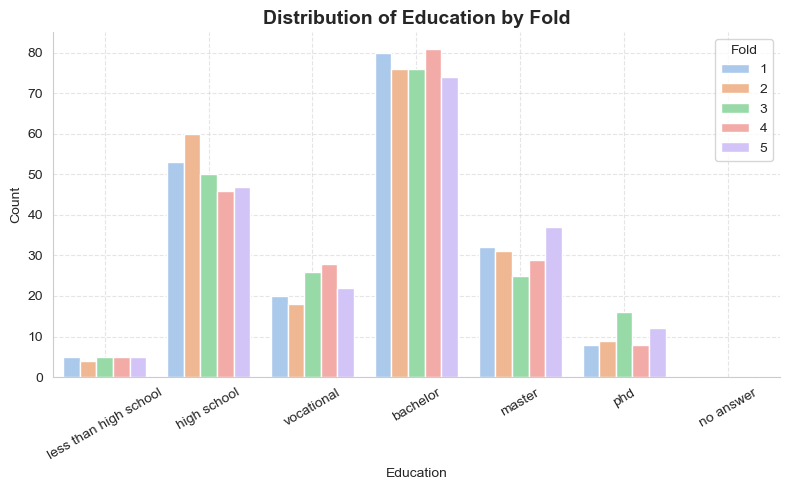

plot saved to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions/cookietheft_edu_group_distribution.png


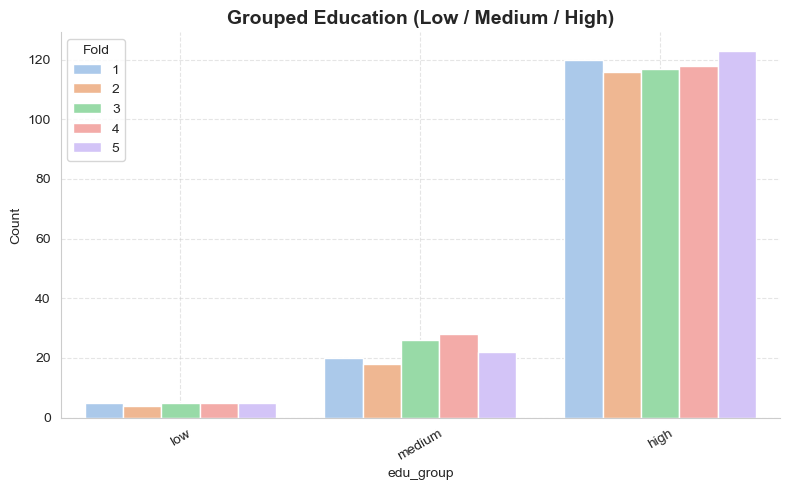

plot saved to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions/cookietheft_socioeconomic_distribution.png


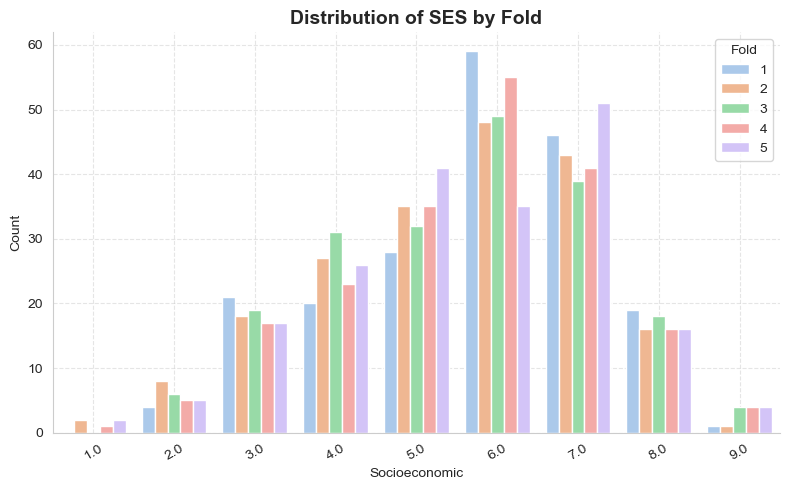

plot saved to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions/cookietheft_ses_group_distribution.png


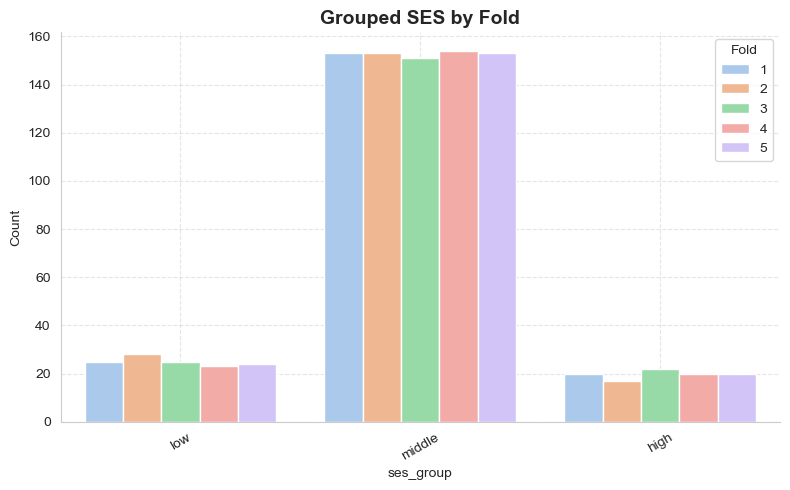

plot saved to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions/cookietheft_age_distribution.png


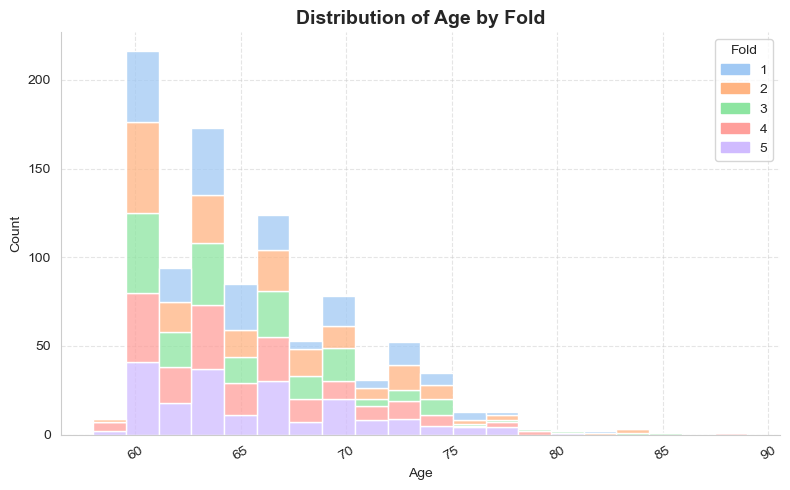

plot saved to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions/cookietheft_age_group_distribution.png


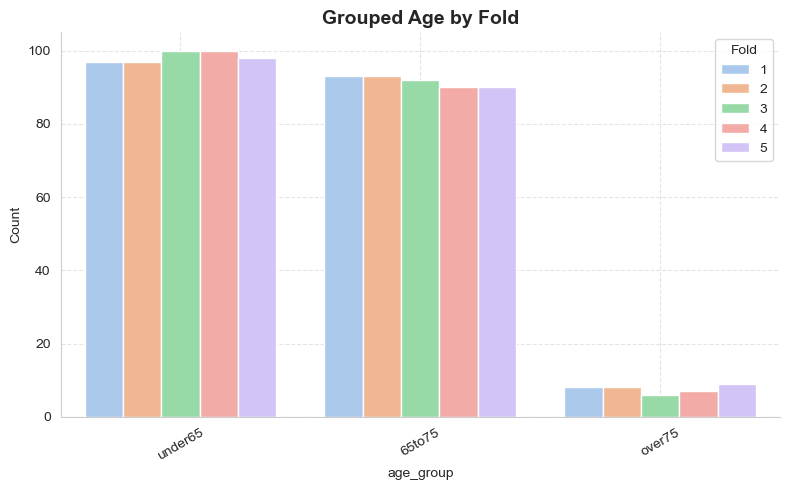

plot saved to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions/cookietheft_gender_distribution.png


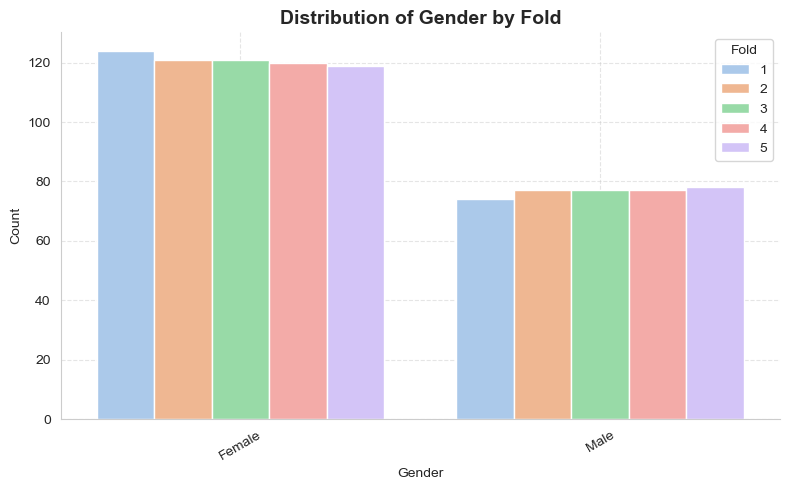

plot saved to: /Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions/cookietheft_country_distribution.png


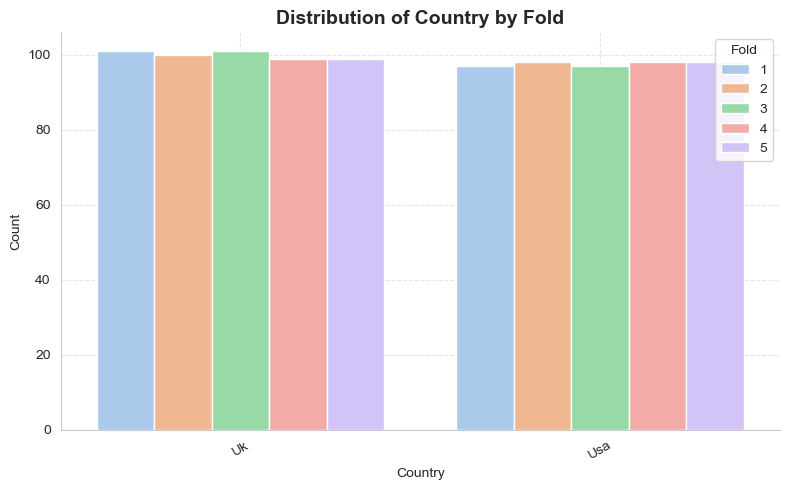

In [30]:
# create plots
save_dir = "/Users/gilanorup/Desktop/Studium/MSc/MA/code/masters_thesis_gn/results/plots/split_distributions"
os.makedirs(save_dir, exist_ok=True)
sns.set_style("whitegrid")
sns.set_palette("pastel")

# education level order
edu_map = {
    "less_than_highschool": "less than high school",
    "high_school": "high school"
}
df["Education"] = df["Education"].replace(edu_map)

edu_order = [
    "less than high school", "high school", "vocational",
    "bachelor", "master", "phd", "no answer"
]

# grouped variable orders
edu_group_order = ["low", "medium", "high"]
ses_group_order = ["low", "middle", "high"]
age_group_order = ["under65", "65to75", "over75"]
# numeric SES order
df["Socioeconomic"] = pd.to_numeric(df["Socioeconomic"], errors="coerce")
ses_order = sorted(df["Socioeconomic"].dropna().unique())

df["FoldNumber"] = df["fold"].astype(str)  # use "1" to "5" instead of "Fold 1" etc.

# plots
plot_distribution("Education", "Distribution of Education by Fold", order=edu_order, legend_loc="upper right")
plot_distribution("edu_group", "Grouped Education (Low / Medium / High)", order=edu_group_order, legend_loc="upper left")
plot_distribution("Socioeconomic", "Distribution of SES by Fold", order=ses_order, legend_loc="upper right")
plot_distribution("ses_group", "Grouped SES by Fold", order=ses_group_order, legend_loc="upper right")
plot_distribution("Age", "Distribution of Age by Fold", continuous=True, legend_loc="upper right")
plot_distribution("age_group", "Grouped Age by Fold", order=age_group_order, legend_loc="upper right")
plot_distribution("Gender", "Distribution of Gender by Fold", order=["Female", "Male"], legend_loc="upper right")
plot_distribution("Country", "Distribution of Country by Fold", legend_loc="upper right")

df.drop(columns="FoldNumber", inplace=True)